In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_labels = {j:i for i, j in enumerate(class_names)}
print(class_names_labels)
IMAGE_SIZE = (50, 50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


In [3]:
#load data
def load_data():
    images=[]
    labels=[]
    path = r'C:\Users\ACER\Downloads\TML PROJECT DATASET\TML PROJECT DATASET'
    for folder in os.listdir(path):
        if folder == ".DS_Store":
            continue
            
        label = class_names_labels[folder]
        for file in os.listdir(os.path.join(path,folder)):
            if file.split('.')[-1] in {'jpg','png', 'jpeg'}:
                img_path = os.path.join(path,folder,file)
                img = Image.open(img_path)
                img = img.convert('RGB')
                img = img.resize(IMAGE_SIZE)
                
                images.append(img)
                labels.append(label)
    images = np.array([np.array(i) for i in images])
    labels = np.array([np.array(i) for i in labels])
    return images,labels

x,y = load_data()

print(x.shape)
print(y.shape)

(2400, 50, 50, 3)
(2400,)


In [4]:
print(x.shape, y.shape)

(2400, 50, 50, 3) (2400,)


In [5]:
type(x)

numpy.ndarray

In [6]:
type(y)

numpy.ndarray

In [7]:
y

array([ 0,  0,  0, ..., 19, 19, 19])

In [8]:
#train-test-split
from sklearn.model_selection import train_test_split
# highest random_state 200
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train, test_size = 0.25, random_state=42)
# x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.25, random_state=0)  

In [9]:
print(x_train.shape)
print(x_validate.shape)
print(x_test.shape)

(1440, 50, 50, 3)
(480, 50, 50, 3)
(480, 50, 50, 3)


In [10]:
#flatten image data
x_train_flat = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2] * x_train.shape[3]) 
x_validate_flat = x_validate.reshape(-1, x_validate.shape[1] * x_validate.shape[2] * x_validate.shape[3]) 
x_test_flat = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

print(x_train_flat.shape, x_test_flat.shape, x_test_flat.shape)

(1440, 7500) (480, 7500) (480, 7500)


In [11]:
print(y_test.shape, y_train.shape, y_validate.shape)

(480,) (1440,) (480,)


In [12]:
x_train_scale = x_train_flat / 255
x_validate_scale = x_validate_flat / 255
x_test_scale = x_test_flat / 255

In [13]:
print(x_train_scale.shape)
print(x_validate_scale.shape)
print(x_test_scale.shape)

(1440, 7500)
(480, 7500)
(480, 7500)


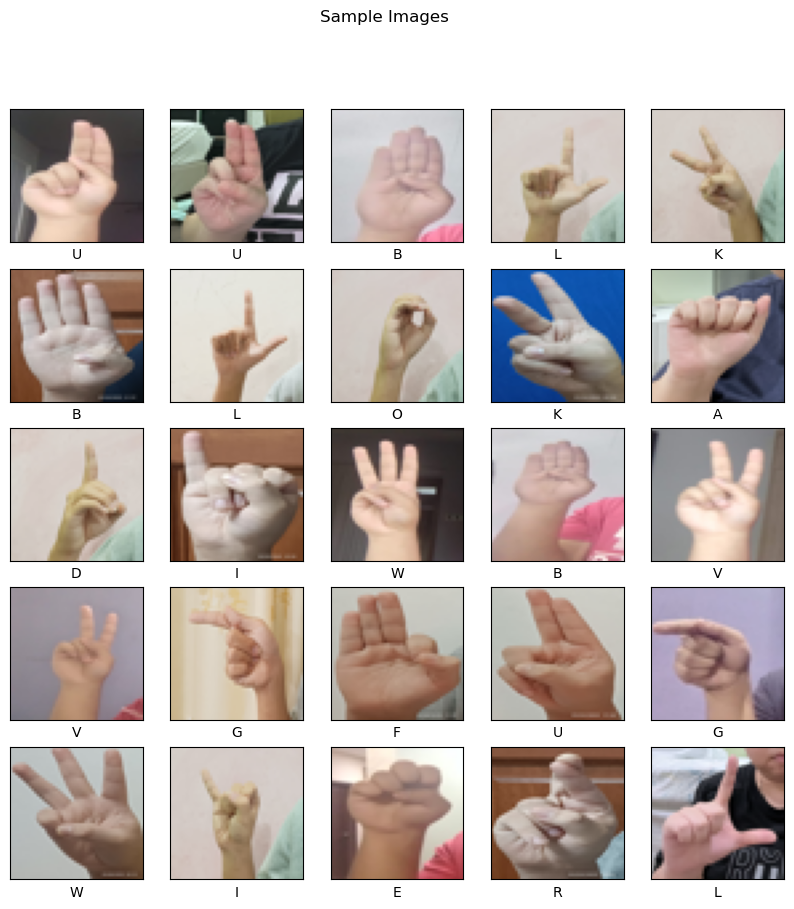

In [14]:
#the images will show in random
random = np.random.choice(len(x_train), size=25, replace=False)

fig = plt.figure(figsize = (10,10))
fig.suptitle("Sample Images")
for i, index in enumerate(random):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [15]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=19)

# Fit the LDA model with x_train data
lda.fit(x_train_scale, y_train)

# Transform the dataset using LDA
x_train_lda = lda.transform(x_train_scale)
x_validate_lda = lda.transform(x_validate_scale)
x_test_lda = lda.transform(x_test_scale)

print(x_train_lda.shape)
print(x_validate_lda.shape)
print(x_test_lda.shape)

(1440, 19)
(480, 19)
(480, 19)


In [16]:
#PCA
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=20)

# Fit the PCA model with x_train data
pca.fit(x_train_scale)


# Transform the dataset using PCA
x_train_pca = pca.transform(x_train_scale)
x_validate_pca = pca.transform(x_validate_scale)
x_test_pca = pca.transform(x_test_scale)

print(x_train_pca.shape)
print(x_validate_pca.shape)
print(x_test_pca.shape)

(1440, 20)
(480, 20)
(480, 20)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_pca = KNeighborsClassifier(n_neighbors=3)

# Train the kNN model using the PCA-transformed training data
knn_pca.fit(x_train_pca, y_train)

# Predict labels for the test data
pca_pred = knn_pca.predict(x_test_pca)

# Calculate and print the training, validation, and testing accuracies
train_accuracy = knn_pca.score(x_train_pca, y_train)
validate_accuracy = knn_pca.score(x_validate_pca, y_validate)
test_accuracy = knn_pca.score(x_test_pca, y_test)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", validate_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.8347222222222223
Validation accuracy: 0.6416666666666667
Testing accuracy: 0.6416666666666667


In [48]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[13  2  0  1  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0 17  0  0  0  4  0  0  0  3  0  0  0  0  3  1  1  1  0  0]
 [ 0  4 18  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 23  0  2  0  0  2  0  0  0  0  0  1  1  1  0  0  0]
 [ 1  2  0  1 15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  4  0  0  1 17  0  0  0  0  0  0  1  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  1 19  2  0  1  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  6 14  0  2  0  1  1  1  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  1  0 18  0  0  2  0  0  1  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  1 11  0  0  0  0  0  4  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 21  0  0  0  1  0  0  0  0  1]
 [ 0  0  2  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 15  4  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  4 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0 15  8  3  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  7  2

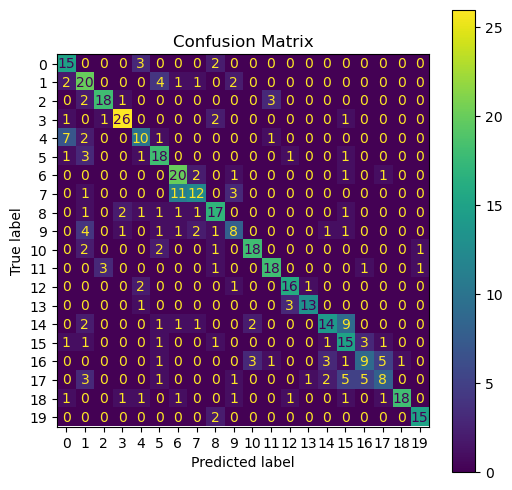

In [67]:
cmd = ConfusionMatrixDisplay(confusion_matrix = cm,
                            display_labels = knn.classes_)
fig, ax = plt.subplots(figsize = (6,6))
ax.set_title('Confusion Matrix')
cmd.plot(ax=ax)
plt.show()

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.52      0.57      0.54        30
           2       0.86      0.75      0.80        24
           3       0.92      0.74      0.82        31
           4       0.75      0.71      0.73        21
           5       0.71      0.68      0.69        25
           6       0.70      0.76      0.73        25
           7       0.78      0.52      0.62        27
           8       0.86      0.72      0.78        25
           9       0.58      0.55      0.56        20
          10       1.00      0.88      0.93        24
          11       0.76      0.79      0.78        24
          12       0.71      0.75      0.73        20
          13       0.71      0.71      0.71        17
          14       0.62      0.50      0.56        30
          15       0.35      0.62      0.45        24
          16       0.24      0.33      0.28        24
          17       0.45    

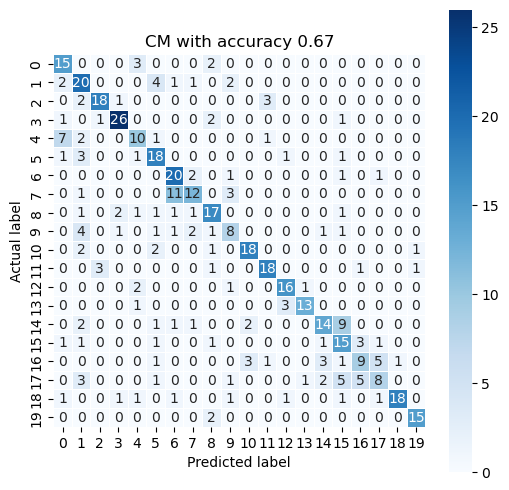

In [66]:
plt.figure(figsize=(6,6))

sns.heatmap(cm, annot=True, fmt='d', linewidth=0.5,
           square=True, cmap='Blues')
plt.title("CM with accuracy {:.2f}".format(
metrics.accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_lda = KNeighborsClassifier(n_neighbors=3)

# Train the kNN model using the LDA-transformed training data
knn_lda.fit(x_train_lda, y_train)

# Predict labels for the test data
lda_pred = knn_lda.predict(x_test_lda)

# Calculate and print the training, validation, and testing accuracies
train_accuracy = knn_lda.score(x_train_lda, y_train)
validate_accuracy = knn_lda.score(x_validate_lda, y_validate)
test_accuracy = knn_lda.score(x_test_lda, y_test)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", validate_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9888888888888889
Validation accuracy: 0.5708333333333333
Testing accuracy: 0.5916666666666667


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_accuracy=0
best_k=0

for k in range(1, 20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    
    y_val_pred=knn.predict(x_train_flat)
    accuracy=accuracy_score(y_train,y_val_pred)
    
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_k=k
        
print("Best k-value:", best_k)
print("Accuracy with best k-value:", best_accuracy)

Best k-value: 1
Accuracy with best k-value: 1.0


In [21]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, x_train_flat, y_train, cv=5)
print(scores)

[0.68055556 0.6875     0.69444444 0.70486111 0.68402778]


In [22]:
scores.mean()

0.6902777777777778

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=[1])
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(x_train_flat, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1]}, scoring='accuracy')

In [26]:
knn.fit(x_train_flat, y_train)
pred = knn.predict(x_train_flat)
print("Training accuracy: ",accuracy_score(y_train,pred))
pred = knn.predict(x_validate_flat)
print("Validation accuracy: ",accuracy_score(y_validate,pred))
pred = knn.predict(x_test_flat)
print("Testing accuracy: ",accuracy_score(y_test,pred))

Training accuracy:  1.0
Validation accuracy:  0.7104166666666667
Testing accuracy:  0.6666666666666666


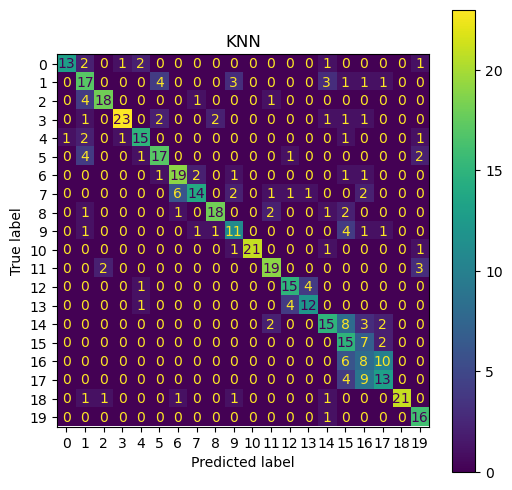

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("KNN")
disp.plot(ax=ax)
plt.show()

In [45]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[13  2  0  1  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0 17  0  0  0  4  0  0  0  3  0  0  0  0  3  1  1  1  0  0]
 [ 0  4 18  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 23  0  2  0  0  2  0  0  0  0  0  1  1  1  0  0  0]
 [ 1  2  0  1 15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  4  0  0  1 17  0  0  0  0  0  0  1  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  1 19  2  0  1  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  6 14  0  2  0  1  1  1  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  1  0 18  0  0  2  0  0  1  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  1 11  0  0  0  0  0  4  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 21  0  0  0  1  0  0  0  0  1]
 [ 0  0  2  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  1  0  0  0  0  0  0  0 15  4  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  4 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0 15  8  3  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  7  2

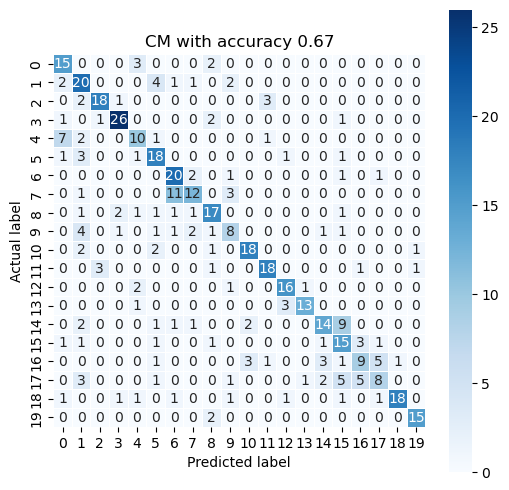

In [71]:
import seaborn as sns

plt.figure(figsize=(6,6))

sns.heatmap(cm, annot=True, fmt='d', linewidth=0.5,
           square=True, cmap='Blues')
plt.title("CM with accuracy {:.2f}".format(
metrics.accuracy_score(y_test, pred)))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [54]:
pca.fit(x_train_flat, y_train)
x_train_pca = pca.transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

In [55]:
print(x_train_pca.shape, x_test_pca.shape)

(1440, 20) (480, 20)


In [60]:
#classification report for knn-lda
from sklearn.metrics import classification_report

print(classification_report(y_test, lda_pred, labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.48      0.75      0.59        20
           1       0.45      0.67      0.54        30
           2       0.68      0.54      0.60        24
           3       0.93      0.84      0.88        31
           4       0.35      0.33      0.34        21
           5       0.52      0.52      0.52        25
           6       0.44      0.56      0.49        25
           7       0.54      0.48      0.51        27
           8       0.80      0.48      0.60        25
           9       0.59      0.50      0.54        20
          10       0.69      0.75      0.72        24
          11       0.72      0.75      0.73        24
          12       0.48      0.60      0.53        20
          13       0.50      0.53      0.51        17
          14       0.71      0.50      0.59        30
          15       0.50      0.62      0.56        24
          16       0.47      0.58      0.52        24
          17       0.62    

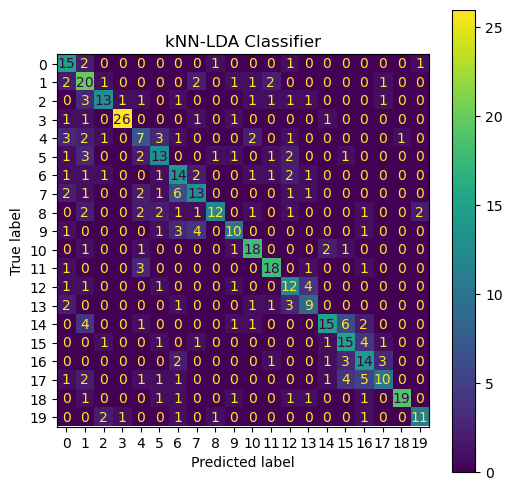

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lda_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))

ax.set_title("kNN-LDA Classifier")
disp.plot(ax=ax)
plt.show() 

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pca_pred, labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.49      0.67      0.56        30
           2       0.82      0.75      0.78        24
           3       0.84      0.84      0.84        31
           4       0.53      0.48      0.50        21
           5       0.58      0.72      0.64        25
           6       0.56      0.80      0.66        25
           7       0.63      0.44      0.52        27
           8       0.63      0.68      0.65        25
           9       0.47      0.40      0.43        20
          10       0.78      0.75      0.77        24
          11       0.78      0.75      0.77        24
          12       0.76      0.80      0.78        20
          13       0.87      0.76      0.81        17
          14       0.67      0.47      0.55        30
          15       0.42      0.62      0.50        24
          16       0.50      0.38      0.43        24
          17       0.50    

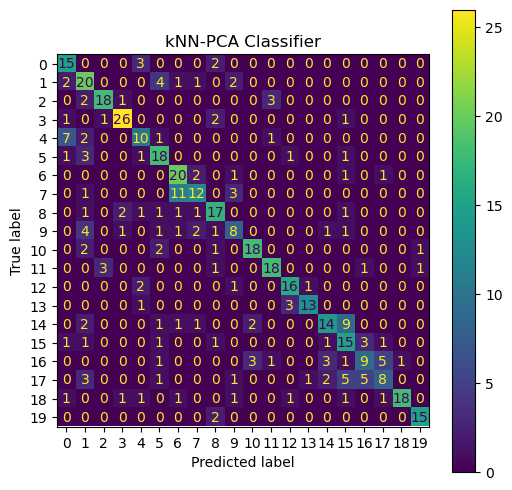

In [70]:
## confusion matrix -- for knn-PCA

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pca_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))

ax.set_title("kNN-PCA Classifier")
disp.plot(ax=ax)
plt.show() 